In [1]:
#Import the needed libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [2]:
#Import the dataset and display it
df= pd.read_csv("walmart-sales-dataset-of-45stores.csv")
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


### Data Preprocessing (Data cleaning) :

In [3]:
#Changing the data type of "Date" to DateTime data type
df['Date']=pd.to_datetime(df['Date'],format='%d-%m-%Y')
print(df.dtypes)

Store                    int64
Date            datetime64[ns]
Weekly_Sales           float64
Holiday_Flag             int64
Temperature            float64
Fuel_Price             float64
CPI                    float64
Unemployment           float64
dtype: object


In [4]:
#Check about the (Na ,Null) existence
df.isna().sum()


Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [5]:
#Check about the "Duplicated values" existence
df.duplicated().sum()

0

In [6]:
#Check and Print the "Unique values" existence
print(df['Store'].unique())
df['Store'].drop_duplicates().is_unique

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45]


True

In [7]:
#Storing only the positive values in this columns
df=df[(df['Weekly_Sales']>0)]
df=df[(df['Fuel_Price']>0)]
df=df[(df['CPI']>0)]
df=df[(df['Unemployment']>0)]
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,2012-10-05,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,2012-10-12,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667


### Notes on this plot :
- It is a "Left Skewed Normal Distribution" 

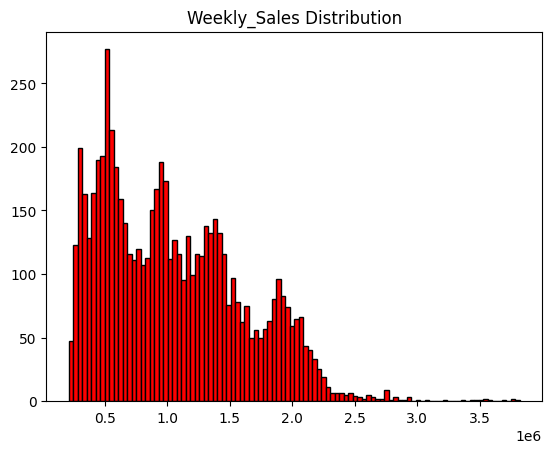

In [8]:
#Displaying the 'Weekly_Sales' Distribution
plt.hist(df['Weekly_Sales'] ,bins=100 ,color='red' ,edgecolor='black')
plt.title('Weekly_Sales Distribution')
plt.show()

### Notes on this plot :
- It is a "Right Skewed Normal Distribution" 

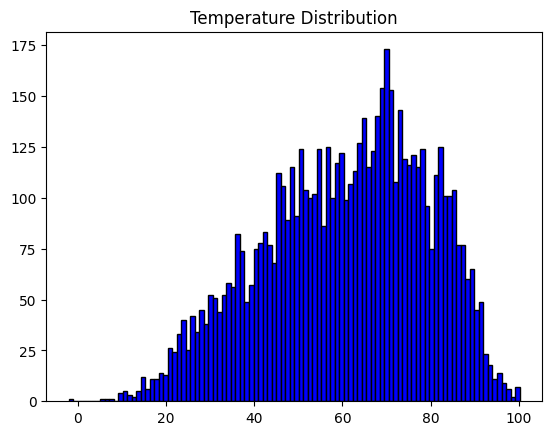

In [9]:
#Displaying the 'Temperature' Distribution
plt.hist(df['Temperature'] ,bins=100 ,color='blue' ,edgecolor='black')
plt.title('Temperature Distribution')
plt.show()

### Notes on this plot :
- It has a "Bimodal Distribution" 

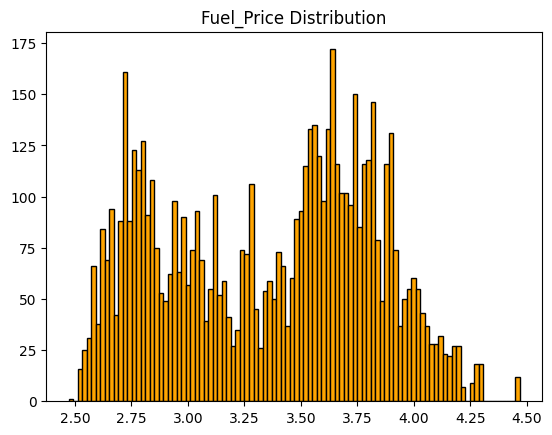

In [10]:
#Displaying the 'Fuel_Price' Distribution
plt.hist(df['Fuel_Price'] ,bins=100 ,color='orange' ,edgecolor='black')
plt.title('Fuel_Price Distribution')
plt.show()

### Notes on this plot :
- It has a "Multi modal Distribution" 

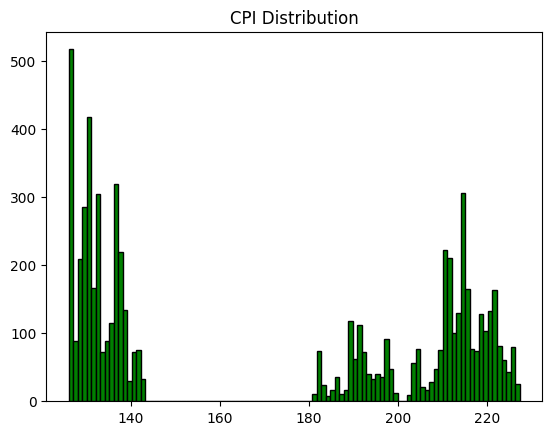

In [11]:
#Displaying the 'CPI' Distribution
plt.hist(df['CPI'] ,bins=100 ,color='green' ,edgecolor='black')
plt.title('CPI Distribution')
plt.show()

### Notes on this plot :
- It has a "Two Sided Normal Distribution (Symmetric)"

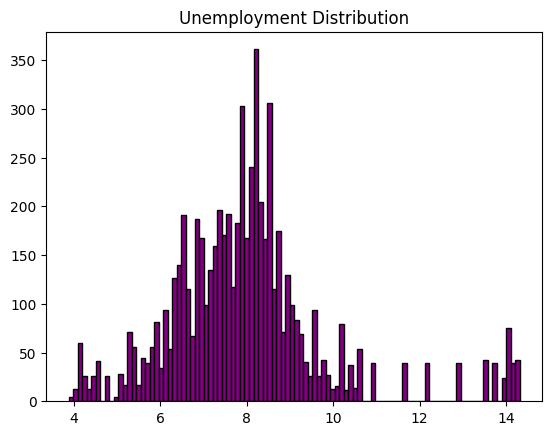

In [12]:
#Displaying the 'Unemployment' Distribution
plt.hist(df['Unemployment'] ,bins=100 ,color='purple' ,edgecolor='black')
plt.title('Unemployment Distribution')
plt.show()

In [13]:
#Print the first 5 stores that has maximum sales
sum_sales=df.groupby('Store')['Weekly_Sales'].sum().sort_values(ascending=False)
sum_sales.head()

Store
20    3.013978e+08
4     2.995440e+08
14    2.889999e+08
13    2.865177e+08
2     2.753824e+08
Name: Weekly_Sales, dtype: float64

In [14]:
#Print the first 5 stores that has maximum standard deviation
standerd_devision=df.groupby('Store')['Weekly_Sales'].std().sort_values(ascending=False)
standerd_devision.head()

Store
14    317569.949476
10    302262.062504
20    275900.562742
4     266201.442297
13    265506.995776
Name: Weekly_Sales, dtype: float64

In [15]:
#Print the holidays in each year
holidays=df[(df['Holiday_Flag']==1)]
print(holidays['Date'].unique())

<DatetimeArray>
['2010-02-12 00:00:00', '2010-09-10 00:00:00', '2010-11-26 00:00:00',
 '2010-12-31 00:00:00', '2011-02-11 00:00:00', '2011-09-09 00:00:00',
 '2011-11-25 00:00:00', '2011-12-30 00:00:00', '2012-02-10 00:00:00',
 '2012-09-07 00:00:00']
Length: 10, dtype: datetime64[ns]


In [16]:
#use the holidays date to get the mean sales of each day of it
super_bowl=['2010-02-12', '2011-02-11', '2012-02-10']
labour_day=['2010-09-10','2011-09-09','2012-09-07']
thankgiving=['2010-11-26','2011-11-25']
christmas=['2010-12-31','2011-12-30']

non_holiday_sales=df[df['Holiday_Flag']==0]['Weekly_Sales'].mean().round(2)
super_bowl_sales=df[df['Date'].isin(super_bowl)]['Weekly_Sales'].mean().round(2)
labour_day_sales=df[df['Date'].isin(labour_day)]['Weekly_Sales'].mean().round(2)
thankgiving_sales=df[df['Date'].isin(thankgiving)]['Weekly_Sales'].mean().round(2)
christmas_sales=df[df['Date'].isin(christmas)]['Weekly_Sales'].mean().round(2)

print("non_holiday_sales : ",non_holiday_sales)
print("super_bowl_sales : ",super_bowl_sales)
print("labour_day_sales : ",labour_day_sales)
print("thankgiving_sales : ",thankgiving_sales)
print("christmas_sales : ",christmas_sales)

non_holiday_sales :  1041256.38
super_bowl_sales :  1079127.99
labour_day_sales :  1042427.29
thankgiving_sales :  1471273.43
christmas_sales :  960833.11


C:\Users\Mohamed Mahmoud\AppData\Local\Temp\ipykernel_6928\2526304015.py:8: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  super_bowl_sales=df[df['Date'].isin(super_bowl)]['Weekly_Sales'].mean().round(2)
C:\Users\Mohamed Mahmoud\AppData\Local\Temp\ipykernel_6928\2526304015.py:9: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  labour_day_sales=df[df['Date'].isin(labour_day)]['Weekly_Sales'].mean().round(2)
C:\Users\Mohamed Mahmoud\AppData\Local\Temp\ipykernel_6928\2526304015.py:10: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is

### Notes on this plot :
#### From the plot we can conclude that some holidays have a positive impact on sales and some holidays has negative impact on the sales :
- The sales reduces in "Christmas" compared with non-holiday days (because there is a missing data of month 11 and 12)
- The sales in "Thanksgiving" witnessing a huge increase compared with non-holiday days
- The sales in the rest increases alittle compared with non-holiday days

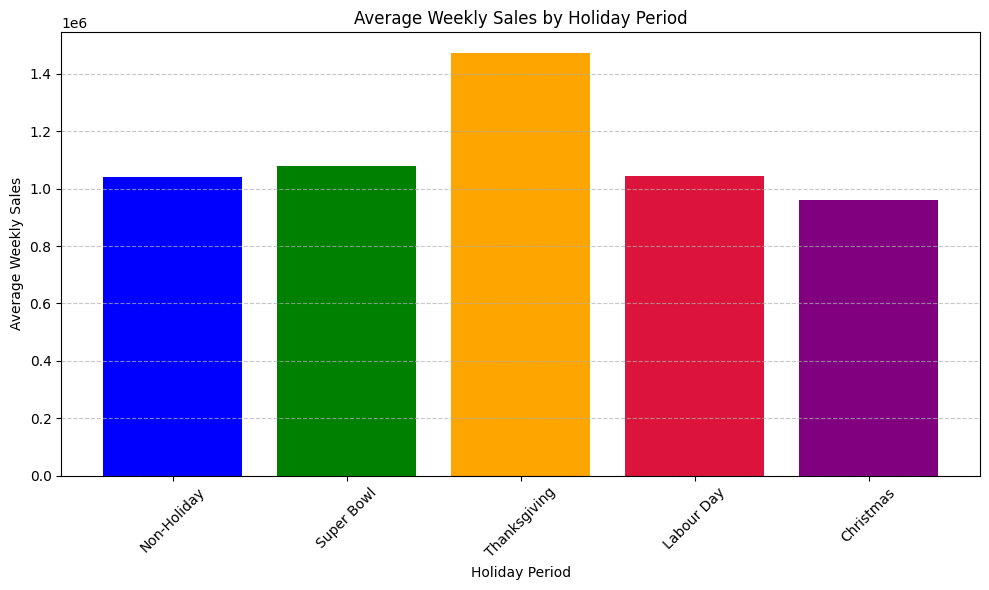

In [17]:
categories = ['Non-Holiday', 'Super Bowl', 'Thanksgiving', 'Labour Day', 'Christmas']
sales = [non_holiday_sales, super_bowl_sales, thankgiving_sales,labour_day_sales, christmas_sales]

# Create bar plot
plt.figure(figsize=(10, 6))
plt.bar(categories, sales, color=['blue', 'green', 'orange', 'crimson', 'purple'])
plt.title('Average Weekly Sales by Holiday Period')
plt.xlabel('Holiday Period')
plt.ylabel('Average Weekly Sales')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the plot
plt.tight_layout()
plt.show()

In [18]:
#Extract months from the "Date"
df['Months']=df['Date'].dt.month
df['Months']

0        2
1        2
2        2
3        2
4        3
        ..
6430     9
6431    10
6432    10
6433    10
6434    10
Name: Months, Length: 6435, dtype: int32

In [19]:
#Extract years from the "Date"
df['Years'] = df['Date'].dt.year
df['Years']

0       2010
1       2010
2       2010
3       2010
4       2010
        ... 
6430    2012
6431    2012
6432    2012
6433    2012
6434    2012
Name: Years, Length: 6435, dtype: int32

### Notes on this plot :
- In the Months like (2,11,12) the sales increases because of holidays

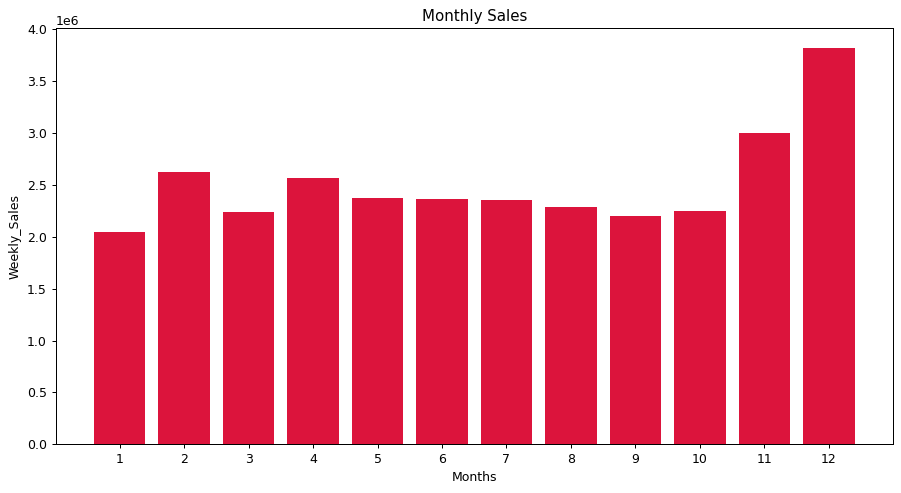

In [20]:
plt.figure(figsize=(12,6),dpi=90)
plt.bar(df['Months'] ,df['Weekly_Sales'],color='crimson')
plt.xlabel('Months')
plt.ylabel('Weekly_Sales')
plt.title('Monthly Sales')
plt.xticks(range(1, 13))
plt.show()

### This plot display the sales of each month for the 3 years
- Like the plot above this shows the increase of sales in holidays and there is increase in some months that don't have a holiday

In [22]:
#Divide the year into 2 Semester and store it
df['Semester']= df['Date'].dt.year.astype(str) + ' S'+ np.where(df['Date'].dt.quarter.gt(2),2,1).astype(str)
df['Semester']

0       2010 S1
1       2010 S1
2       2010 S1
3       2010 S1
4       2010 S1
         ...   
6430    2012 S2
6431    2012 S2
6432    2012 S2
6433    2012 S2
6434    2012 S2
Name: Semester, Length: 6435, dtype: object

### Notes on this plot :
- Semester 2 has the most sales in the year for all the 3 years
- Semester 2 of 2012 has low sales compare to the other 2 years because 2012 data misses the data of the most important months for sales (11,12)

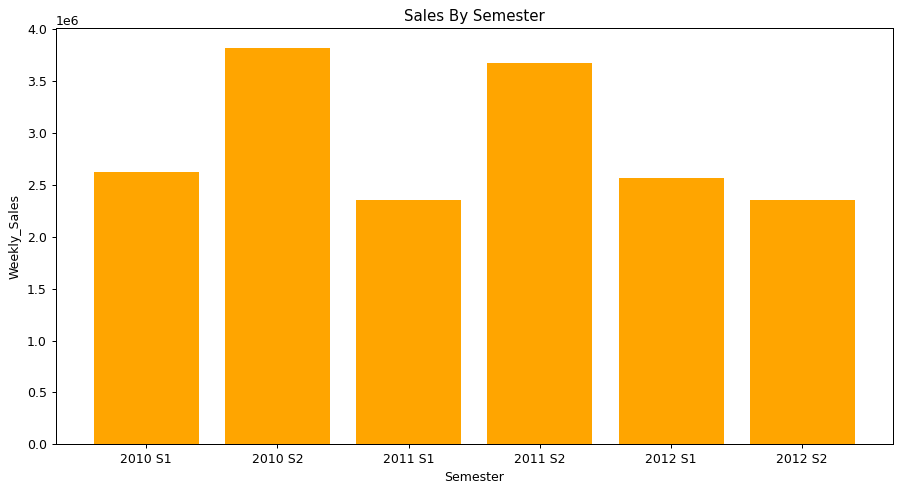

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Months,Years,Semester
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,2,2010,2010 S1
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,2,2010,2010 S1
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2,2010,2010 S1
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2,2010,2010 S1
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,3,2010,2010 S1
...,...,...,...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684,9,2012,2012 S2
6431,45,2012-10-05,733455.07,0,64.89,3.985,192.170412,8.667,10,2012,2012 S2
6432,45,2012-10-12,734464.36,0,54.47,4.000,192.327265,8.667,10,2012,2012 S2
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667,10,2012,2012 S2


In [23]:
plt.figure(figsize=(12,6),dpi=90)
plt.bar(df['Semester'] ,df['Weekly_Sales'],color='orange')
plt.xlabel('Semester')
plt.ylabel('Weekly_Sales')
plt.title('Sales By Semester')
plt.show()
df

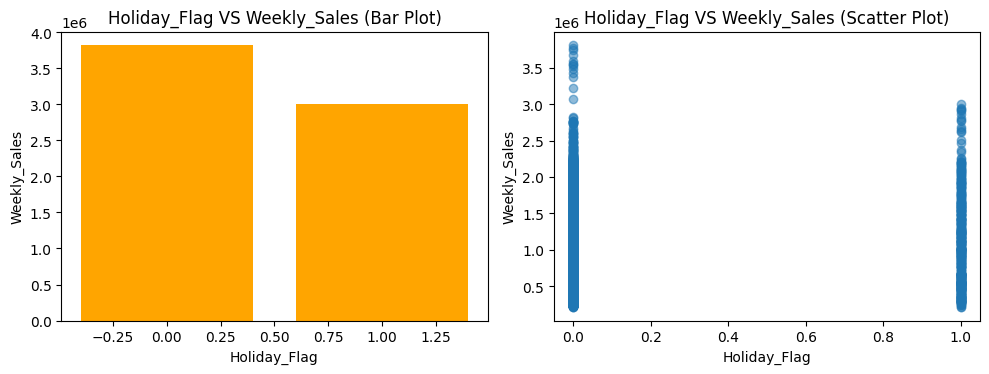

In [24]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# Plotting the bar plot on the first subplot (axes[0])
axes[0].bar(df['Holiday_Flag'], df['Weekly_Sales'], color='orange')
axes[0].set_xlabel('Holiday_Flag')
axes[0].set_ylabel('Weekly_Sales')
axes[0].set_title('Holiday_Flag VS Weekly_Sales (Bar Plot)')

# Plotting the scatter plot on the second subplot (axes[1])
axes[1].scatter(df['Holiday_Flag'], df['Weekly_Sales'],alpha=0.5)
axes[1].set_xlabel('Holiday_Flag')
axes[1].set_ylabel('Weekly_Sales')
axes[1].set_title('Holiday_Flag VS Weekly_Sales (Scatter Plot)')

plt.tight_layout()
plt.show()

### Notes on this plot :
- The sales decrease because of the low Temperature and increase by the increase of the Temperature 

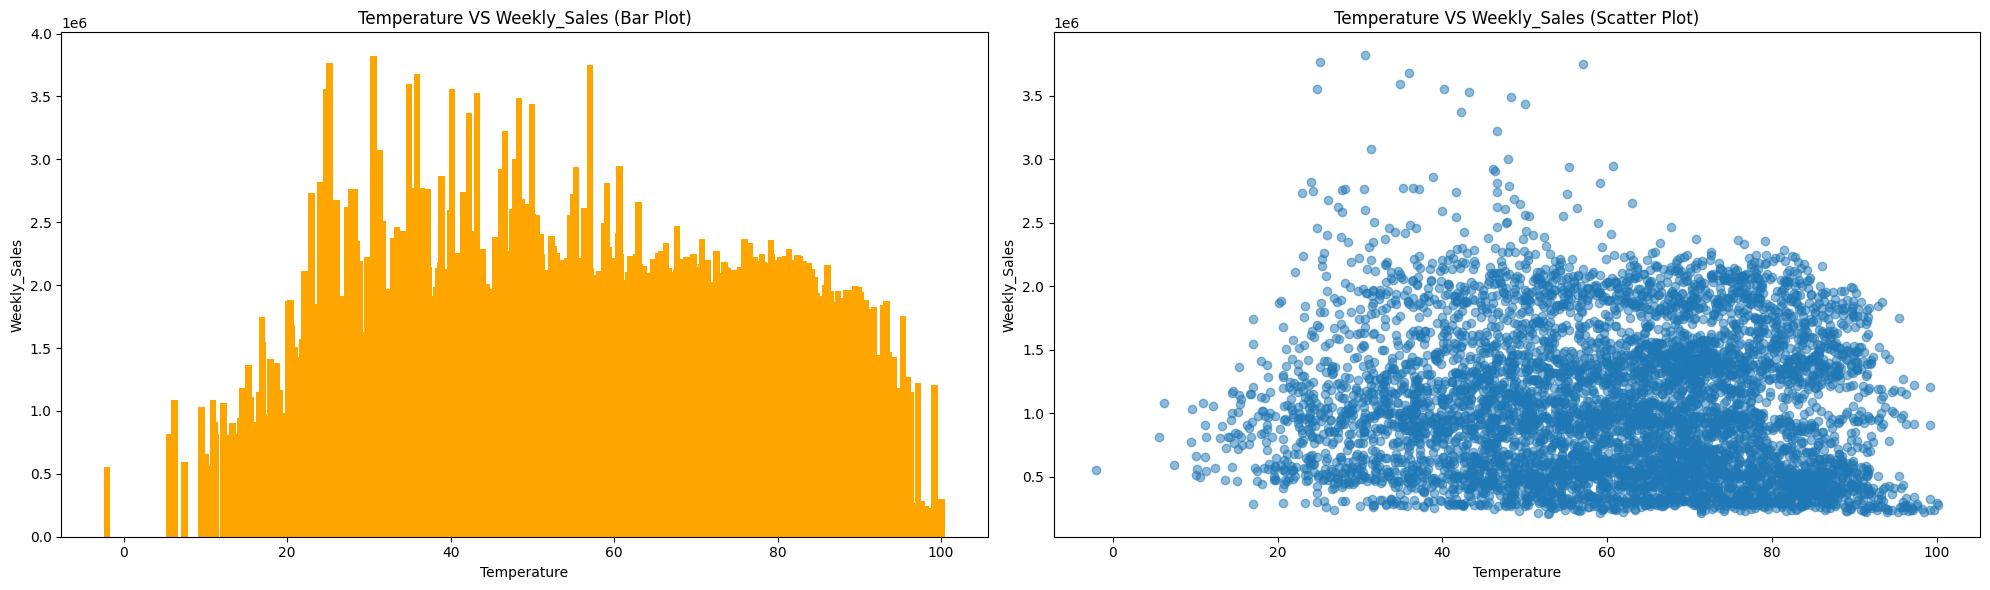

In [25]:
fig, axes = plt.subplots(1, 2, figsize=(20, 6))  # Create subplots

# Plotting on the first subplot
axes[0].bar(df['Temperature'], df['Weekly_Sales'], color='orange')
axes[0].set_xlabel('Temperature')
axes[0].set_ylabel('Weekly_Sales')
axes[0].set_title('Temperature VS Weekly_Sales (Bar Plot)')

# Plotting on the second subplot
axes[1].scatter(df['Temperature'], df['Weekly_Sales'],alpha=0.5)
axes[1].set_xlabel('Temperature')
axes[1].set_ylabel('Weekly_Sales')
axes[1].set_title('Temperature VS Weekly_Sales (Scatter Plot)')

plt.tight_layout()
plt.show()

### Notes on this plot :
- The sales increase by increasing the "Fuel_Price" at certain price for the fuel and decrease at a certain price for the fuel

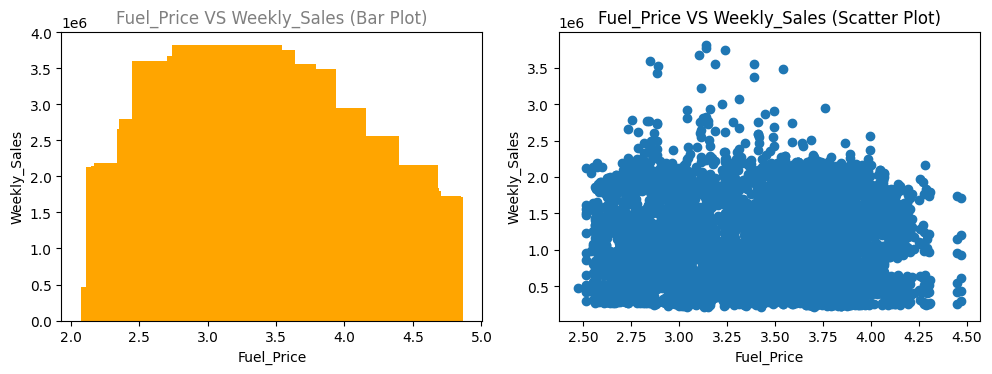

In [26]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))  # Create subplots

# Plotting on the first subplot
axes[0].bar(df['Fuel_Price'], df['Weekly_Sales'], color='orange')
axes[0].set_xlabel('Fuel_Price')
axes[0].set_ylabel('Weekly_Sales')
axes[0].set_title('Fuel_Price VS Weekly_Sales (Bar Plot)',alpha=0.5)

# Plotting on the second subplot
axes[1].scatter(df['Fuel_Price'], df['Weekly_Sales'])
axes[1].set_xlabel('Fuel_Price')
axes[1].set_ylabel('Weekly_Sales')
axes[1].set_title('Fuel_Price VS Weekly_Sales (Scatter Plot)')

plt.tight_layout()
plt.show()


### Notes on this plot :
- no colloration

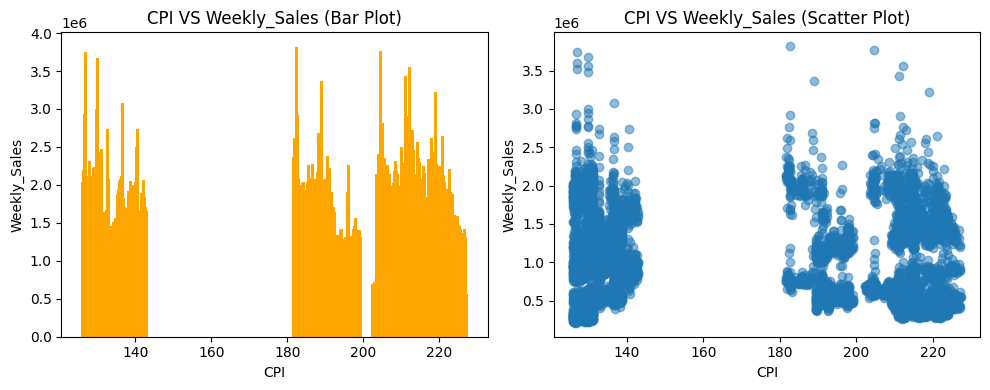

In [27]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))  # Create subplots

# Plotting on the first subplot
axes[0].bar(df['CPI'], df['Weekly_Sales'], color='orange')
axes[0].set_xlabel('CPI')
axes[0].set_ylabel('Weekly_Sales')
axes[0].set_title('CPI VS Weekly_Sales (Bar Plot)')

# Plotting on the second subplot
axes[1].scatter(df['CPI'], df['Weekly_Sales'],alpha=0.5)
axes[1].set_xlabel('CPI')
axes[1].set_ylabel('Weekly_Sales')
axes[1].set_title('CPI VS Weekly_Sales (Scatter Plot)')

plt.tight_layout()
plt.show()


### Notes on this plot :
- In the case of normal Unemployment rate "Walmart Stores" offer a low prices for consumers looking to save money and the sales increase
- In the case of high Unemployment rate the sales decrease

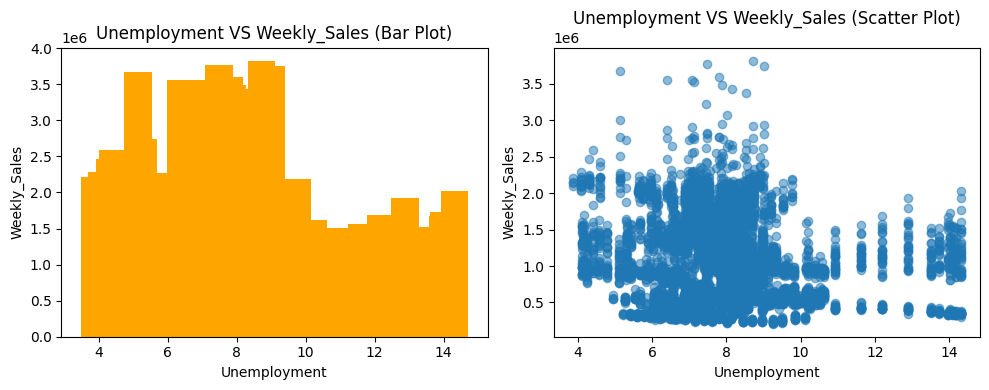

In [28]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))  # Create subplots

# Plotting on the first subplot
axes[0].bar(df['Unemployment'], df['Weekly_Sales'], color='orange')
axes[0].set_xlabel('Unemployment')
axes[0].set_ylabel('Weekly_Sales')
axes[0].set_title('Unemployment VS Weekly_Sales (Bar Plot)')

# Plotting on the second subplot
axes[1].scatter(df['Unemployment'], df['Weekly_Sales'],alpha=0.5)
axes[1].set_xlabel('Unemployment')
axes[1].set_ylabel('Weekly_Sales')
axes[1].set_title('Unemployment VS Weekly_Sales (Scatter Plot)')

plt.tight_layout()
plt.show()

<!-- df['Month'] = df['Date'].dt.month  # Extract month
df['Year'] = df['Date'].dt.year  # Extract year

# Group by month and year, then sum weekly sales
monthly_sales = df.groupby(['Month', 'Year'])['Weekly_Sales'].sum().unstack()

plt.figure(figsize=(12, 6), dpi=90)

# Plotting clustered bars for each year
monthly_sales.plot(kind='bar', width=0.8)

plt.xlabel('Months')
plt.ylabel('Weekly Sales')
plt.title('Monthly Sales')
plt.xticks(range(1, 13), labels=range(1, 13))
plt.legend(title='Year')
plt.show() -->